In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvdmlzaS9ibG9n'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/tmp/ipykernel_8963/2125025160.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/usr/lib/python3.12/importlib/_bootstrap.py": 1726064257.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1726064257.0, "/usr/lib/python3.12/zipimport.py": 1726064257.0, "/usr/lib/python3.12/codecs.py": 1726064257.0, "/usr/lib/python3.12/encodings/aliases.py": 1726064257.0, "/usr/lib/python3.12/encodings/__init__.py": 1726064257.0, "/usr/lib/python3.12/encodings/utf_8.py": 1726064257.0, "/usr/lib/python3.12/abc.py": 1726064257.0, "/usr/lib/python3.12/io.py": 1726064257.0, "/usr/lib/python3.12/stat.py": 1726064257.0, "/usr/lib/python3.12/_collections_abc.py": 1726064257.0, "/usr/lib/python3.12/genericpath.py": 1726064257.0, "/usr/lib/python3.12/posixpath.py": 1726064257.0, "/usr/lib/python3.12/os.py": 1726064257.0, "/usr/lib/python3.12/_sitebuiltins.py": 1726064257.0, "/home/visi/blog/.venv/lib/python3.12/site-packages/_distutils_hack/__init__.py": 1729606288.1787431, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/python3.12/site.py": 1726064257.0, "/usr/lib

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from fastai.vision.widgets import *

In [4]:
!  pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [6]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [7]:
results = search_images_ddg('car') # list of urls of cars
ims = results.attrgot('contentUrl')
len(ims)

200

In [8]:
results[0]

'https://carsmechinery.com/wp-content/uploads/2023/02/58758dd824ee488384fbcb5a94ddb514-scaled.jpg'

In [9]:
 ??verify_images   # documentation of a function 

Object `verify_images   # documentation of a function` not found.


In [10]:
ims = ['https://th.bing.com/th/id/OIP.XQ6CyncXgEdljRssh_LAIwHaEK?rs=1&pid=ImgDetMain']

In [11]:
dest = 'images/car.jpg'
download_url(ims[0], dest)

Path('images/car.jpg')

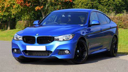

In [12]:
im = Image.open(dest)
im.to_thumb(128,128)

In [13]:
searches = 'car','bicycle','e-scooter' 
path = Path('car_bicycle_or_escooter')

In [14]:
if not path.exists():
    path.mkdir()
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_ddg(f'{o}',100)
        download_images(dest, urls=results)

In [15]:
fns = get_image_files(path)
fns

(#285) [Path('car_bicycle_or_escooter/car/46e219ab-a63a-4fd8-b645-f5cfae44cdf2.jpg'),Path('car_bicycle_or_escooter/car/2dcba47a-e5a5-4ad4-a487-2e59c0537e5b.jpg'),Path('car_bicycle_or_escooter/car/965167a9-1a37-4652-a35d-51cc7dfba7cd.jpg'),Path('car_bicycle_or_escooter/car/ba89ac95-7d78-4c76-afb5-754d90bfa62c.jpg'),Path('car_bicycle_or_escooter/car/f391b233-6d75-4050-9f64-9ca1a0ec3fe3.jpg'),Path('car_bicycle_or_escooter/car/14cc0f49-b9f1-4bff-b687-befea160c56e.jpg'),Path('car_bicycle_or_escooter/car/fe549b66-9f30-49bd-b6cf-ffa867f15796.jpg'),Path('car_bicycle_or_escooter/car/56b1df58-d448-43cd-9134-2e0366227e3a.jpg'),Path('car_bicycle_or_escooter/car/6eace0e7-f482-4400-91f9-93998afcac28.png'),Path('car_bicycle_or_escooter/car/b0ce8796-653f-45c1-996c-b9bcdfe79d72.jpg')...]

In [16]:
failed = verify_images(fns)
failed

(#18) [Path('car_bicycle_or_escooter/car/6eace0e7-f482-4400-91f9-93998afcac28.png'),Path('car_bicycle_or_escooter/car/a25fac5a-48e5-404f-9d40-2a55539878bb.jpg'),Path('car_bicycle_or_escooter/car/d34f815b-4502-4e09-bc95-27d4d78db518.jpg'),Path('car_bicycle_or_escooter/car/409cd34a-292b-4c14-a227-24c20cf8dab2.jpg'),Path('car_bicycle_or_escooter/car/453c2258-b757-46c7-bd7e-60cad26aa581.jpg'),Path('car_bicycle_or_escooter/car/86e22584-acad-4918-85a1-755aadba3f24.jpg'),Path('car_bicycle_or_escooter/bicycle/b77bfed1-5915-4a78-853d-0ee4035b42c9.jpg'),Path('car_bicycle_or_escooter/bicycle/b08a9e3b-68ee-47b1-b930-0d42763d25e9.jpg'),Path('car_bicycle_or_escooter/bicycle/66bf96d2-0fa0-4149-bfc9-f36e9414f936.jpg'),Path('car_bicycle_or_escooter/bicycle/5d6433c9-2518-428c-9880-0ce5d497dd40.svg')...]

In [17]:
failed.map(Path.unlink)

(#18) [None,None,None,None,None,None,None,None,None,None...]

In [18]:
fns = get_image_files(path)  # get new list of the files in our path
fns  # from 272, now we have 254 files, after unlinking the corrupted files.

(#267) [Path('car_bicycle_or_escooter/car/46e219ab-a63a-4fd8-b645-f5cfae44cdf2.jpg'),Path('car_bicycle_or_escooter/car/2dcba47a-e5a5-4ad4-a487-2e59c0537e5b.jpg'),Path('car_bicycle_or_escooter/car/965167a9-1a37-4652-a35d-51cc7dfba7cd.jpg'),Path('car_bicycle_or_escooter/car/ba89ac95-7d78-4c76-afb5-754d90bfa62c.jpg'),Path('car_bicycle_or_escooter/car/f391b233-6d75-4050-9f64-9ca1a0ec3fe3.jpg'),Path('car_bicycle_or_escooter/car/14cc0f49-b9f1-4bff-b687-befea160c56e.jpg'),Path('car_bicycle_or_escooter/car/fe549b66-9f30-49bd-b6cf-ffa867f15796.jpg'),Path('car_bicycle_or_escooter/car/56b1df58-d448-43cd-9134-2e0366227e3a.jpg'),Path('car_bicycle_or_escooter/car/b0ce8796-653f-45c1-996c-b9bcdfe79d72.jpg'),Path('car_bicycle_or_escooter/car/f6e5db6a-4632-4b34-a098-187301a0fd05.jpg')...]

In [19]:
data = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [20]:
dls = data.dataloaders(path)

/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


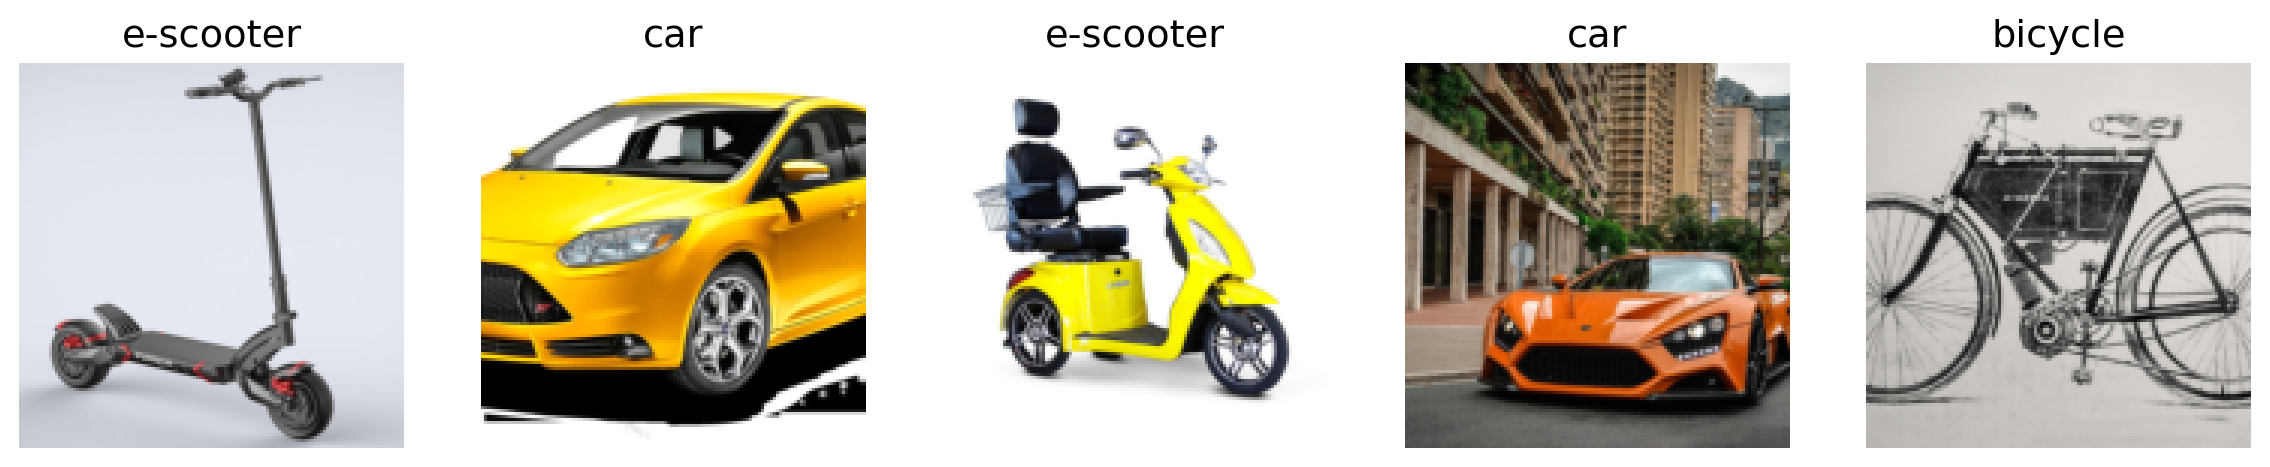

In [21]:
dls.valid.show_batch(max_n=5, nrows=1)

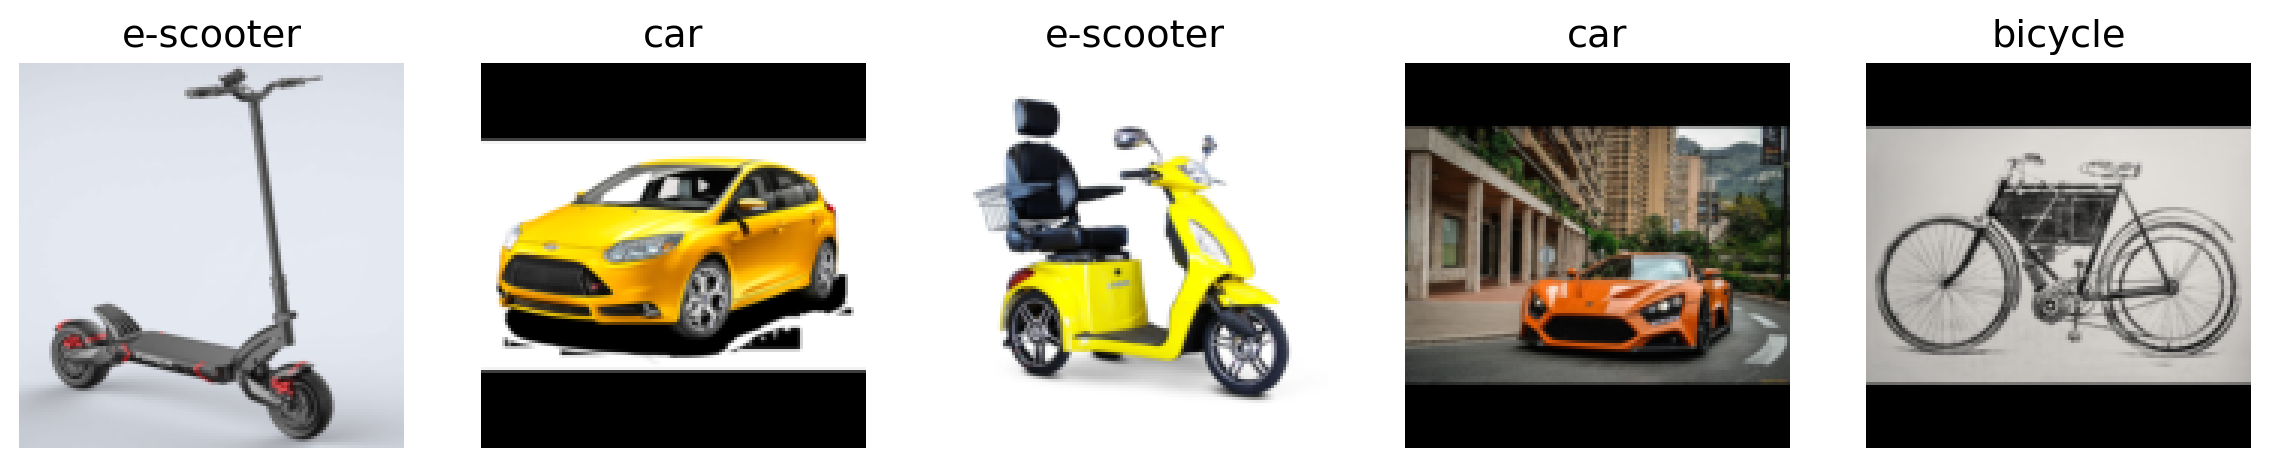

In [22]:
data = data.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = data.dataloaders(path)
dls.valid.show_batch(max_n=5, nrows=1)

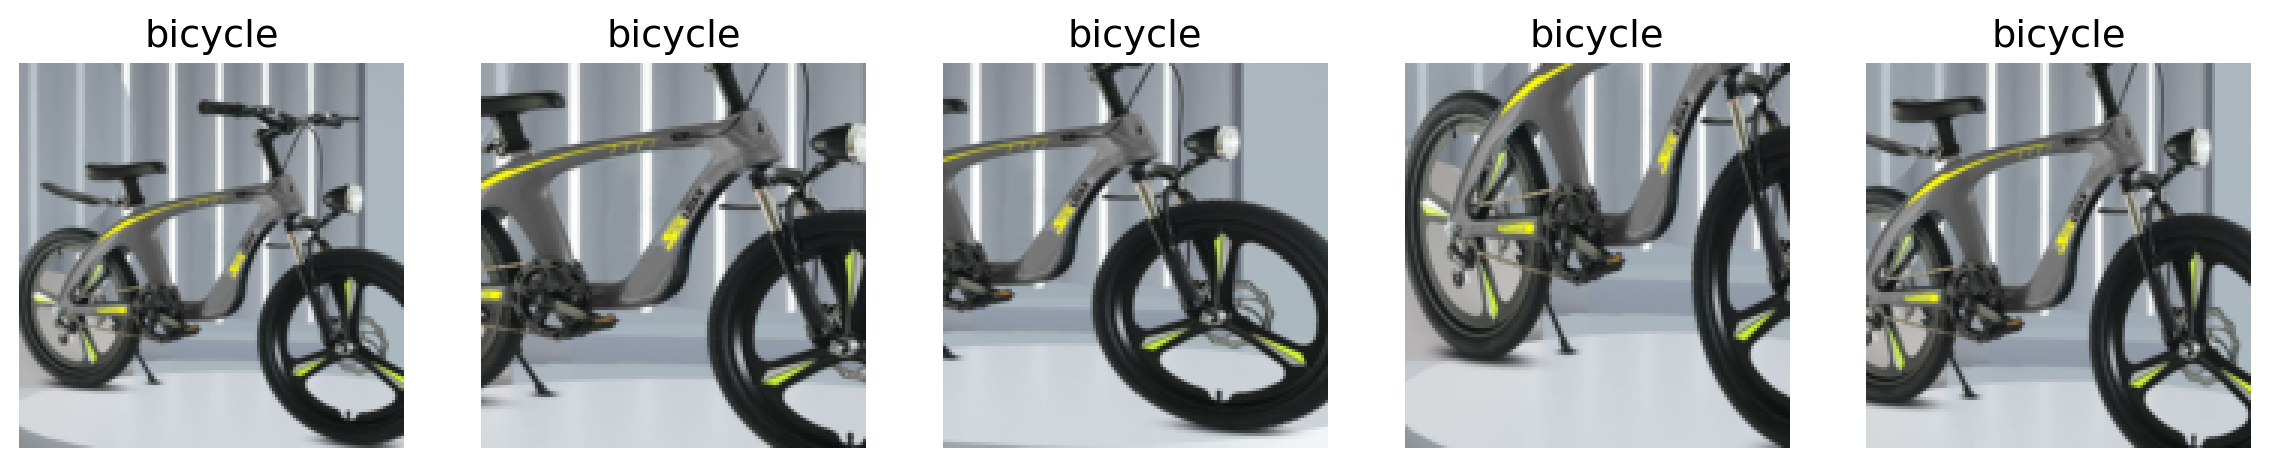

In [23]:
data = data.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = data.dataloaders(path)
dls.train.show_batch(max_n=5, nrows=1, unique=True)

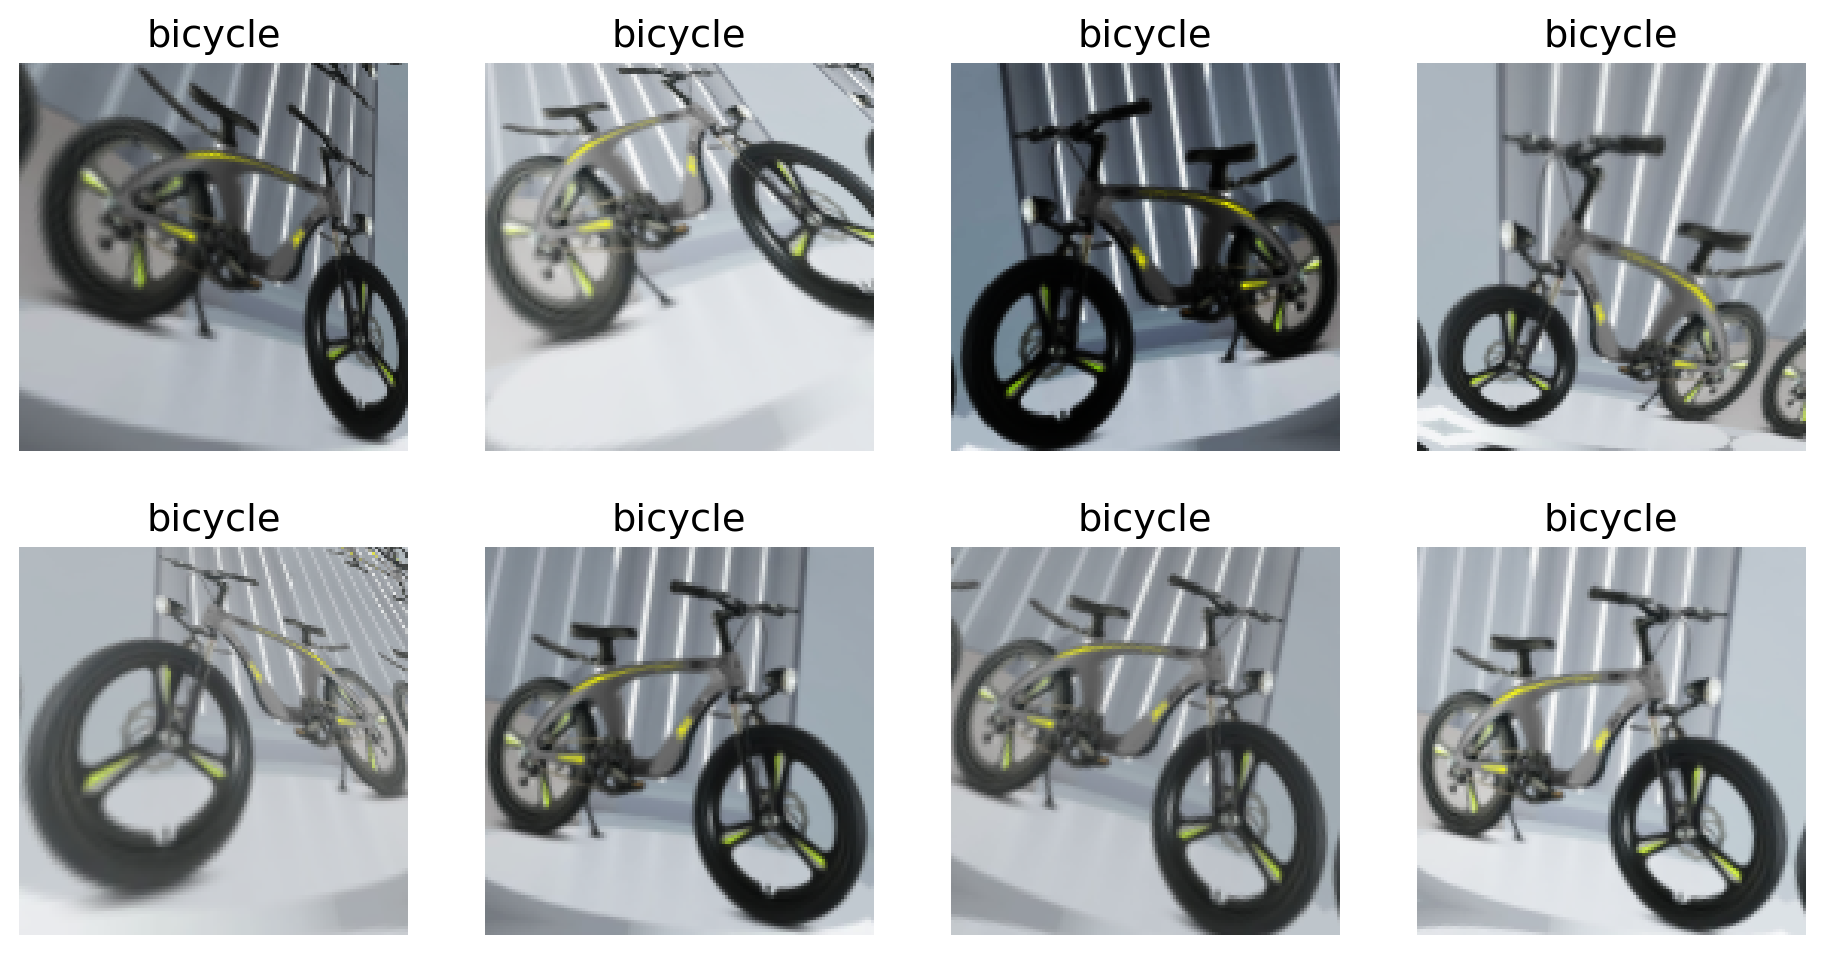

In [24]:
data = data.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = data.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [25]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = data.dataloaders(path)

In [26]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

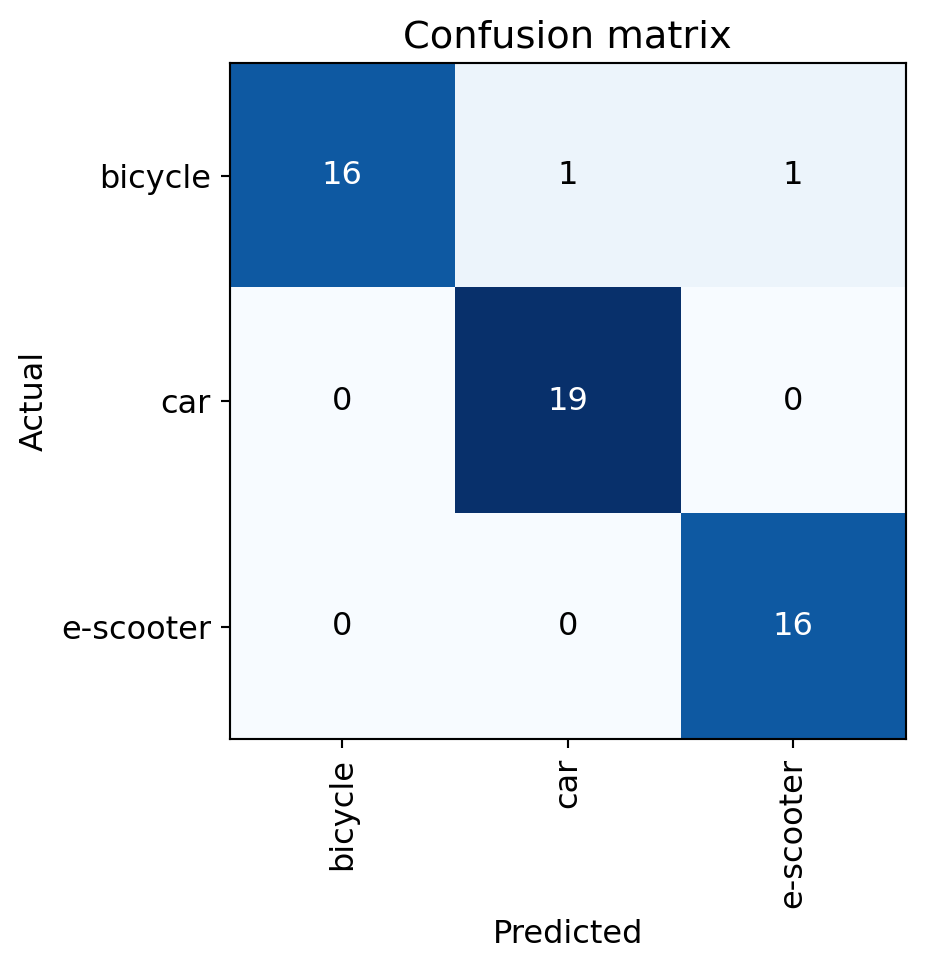

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

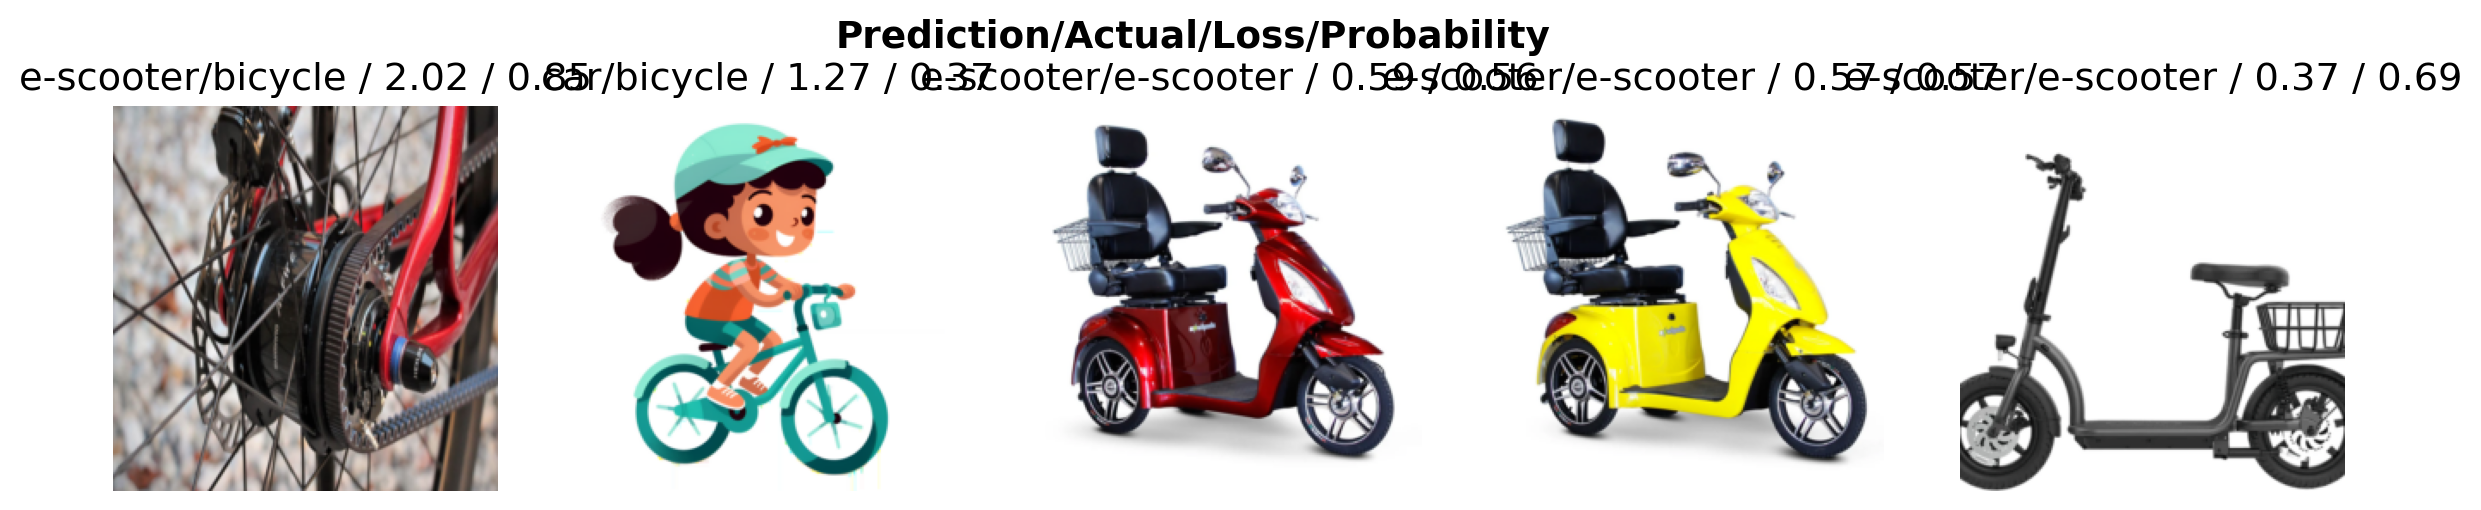

In [28]:
interp.plot_top_losses(5, nrows=1)

In [29]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [30]:
cleaner.delete()  

(#0) []

In [31]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [32]:
fns = get_image_files(path)
fns

(#267) [Path('car_bicycle_or_escooter/car/46e219ab-a63a-4fd8-b645-f5cfae44cdf2.jpg'),Path('car_bicycle_or_escooter/car/2dcba47a-e5a5-4ad4-a487-2e59c0537e5b.jpg'),Path('car_bicycle_or_escooter/car/965167a9-1a37-4652-a35d-51cc7dfba7cd.jpg'),Path('car_bicycle_or_escooter/car/ba89ac95-7d78-4c76-afb5-754d90bfa62c.jpg'),Path('car_bicycle_or_escooter/car/f391b233-6d75-4050-9f64-9ca1a0ec3fe3.jpg'),Path('car_bicycle_or_escooter/car/14cc0f49-b9f1-4bff-b687-befea160c56e.jpg'),Path('car_bicycle_or_escooter/car/fe549b66-9f30-49bd-b6cf-ffa867f15796.jpg'),Path('car_bicycle_or_escooter/car/56b1df58-d448-43cd-9134-2e0366227e3a.jpg'),Path('car_bicycle_or_escooter/car/b0ce8796-653f-45c1-996c-b9bcdfe79d72.jpg'),Path('car_bicycle_or_escooter/car/f6e5db6a-4632-4b34-a098-187301a0fd05.jpg')...]

In [33]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = data.dataloaders(path)

In [34]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


/home/visi/blog/.venv/lib/python3.12/site-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
